In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy


from sklearn.utils import resample

In [2]:
#import files

trainorig = pd.read_csv('train_jqd04QH.csv')
testorig = pd.read_csv('test_GYi4Gz5.csv')

Explore the data --------------------------------------------------------------------------------------

In [3]:
trainorig.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0


In [4]:
trainorig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
enrollee_id               18359 non-null int64
city                      18359 non-null object
city_development_index    18359 non-null float64
gender                    14261 non-null object
relevent_experience       18359 non-null object
enrolled_university       18017 non-null object
education_level           17902 non-null object
major_discipline          15521 non-null object
experience                18300 non-null object
company_size              13580 non-null object
company_type              13320 non-null object
last_new_job              17992 non-null object
training_hours            18359 non-null int64
target                    18359 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB


In [5]:
trainorig.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [6]:
#enrollee_id', - id
#'city', - categ                
#'city_development_index', - cont
#'gender', - categ
#'relevent_experience', - cont 
#'enrolled_university', -categ
#'education_level', - categ/cont
#'major_discipline', - categ
#'experience', - cont
#'company_size', - cont
#'company_type', - categ
#'last_new_job', -cont
#'training_hours', -cont
#'target' -categ

#for categ - check max freq - assign this val to missing values
#for cont - find central tendency - using mean,median mode - use histo, barplot

In [7]:
#we have null values in 

#-gender (4000+)  - dependent on city, 
#-enrolled_university(200+) 
#-education_level  (400+)
#-major_discipline (3000+)
#-experience (58)
#-company_size (5000+)
#-company_type (5000+)
#-last_new_job(350+)

#TODO : Deal with missing values#

In [8]:
#another way to fill missing values - 

#if checking wrt another val, 
#    and both values are continuous - use scatter plot

#Scatter plot shows the relationship between two variable 
#but does not indicates the strength of relationship amongst them. 
#To find the strength of the relationship, we use Correlation.



In [9]:
trainorig.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [10]:
trainorig.nunique()

enrollee_id               18359
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [11]:
# Correlation between numerical variables
#matrix = trainorig.corr()
#f, ax = plt.subplots(figsize=(9, 6))
#sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [12]:
trainorig['target'].value_counts(normalize = True)

0    0.867912
1    0.132088
Name: target, dtype: float64

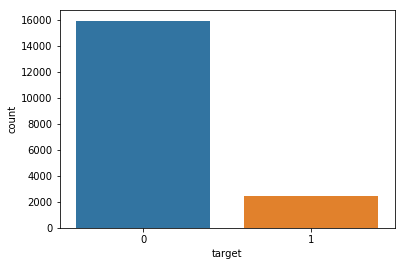

In [13]:
ax = sns.countplot(x="target", data=trainorig)#, hue = 'is_pass')

In [14]:
#here we can see that almost 86% of data has '0' target value while only 13% data has '1' target value
#hence while building the model, we need to ensure that equal proportions of both are taken

In [15]:
#trainorig['city'].unique()

In [16]:
#TODO : check which city performs best, and which worst

In [17]:
#TODO : convert university names to numerical

In [18]:
#trainorig.city.unique
trainorig['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', 'Part time course', nan],
      dtype=object)

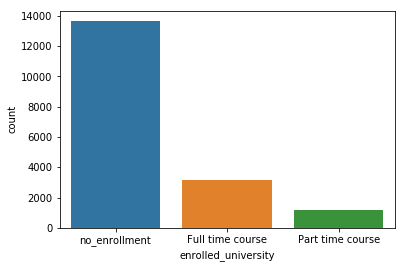

In [19]:
ax = sns.countplot(x="enrolled_university", data=trainorig)

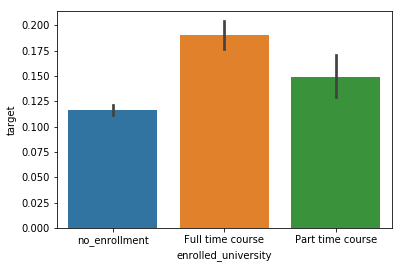

In [20]:
#plt.figure(figsize=(12,4))
sns.barplot(trainorig['enrolled_university'], trainorig['target'])

In [21]:
#Deducations :
#1.most of the job lookers are already unemployed, 
#2. few are alredy on a full time, and further few are working parttime.

In [22]:
#TODO : check which university performs best, and which worst

In [23]:
#TODO : convert education_level names to numerical

In [24]:
#trainorig.city.unique
trainorig['education_level'].unique()

array(['Graduate', 'Masters', 'High School', 'Phd', nan, 'Primary School'],
      dtype=object)

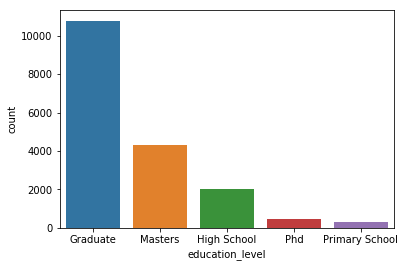

In [25]:
ax = sns.countplot(x="education_level", data=trainorig)

In [26]:
#Deducation:
#1. Majority are graduates, followed by post graduates
#2. we have a few studuying in primary school as well.

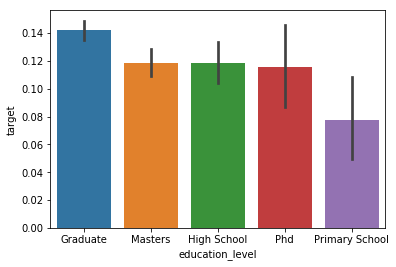

In [27]:
# education vs is_pass
#plt.figure(figsize=(12,4))
sns.barplot(trainorig['education_level'], trainorig['target'])

In [28]:
#TODO : check which education_level performs best, and which worst

In [29]:
#TODO : convert major_discipline names to numerical

In [30]:
#trainorig.city.unique
trainorig['major_discipline'].unique()

array(['STEM', 'Other', 'No Major', nan, 'Business Degree', 'Arts',
       'Humanities'], dtype=object)

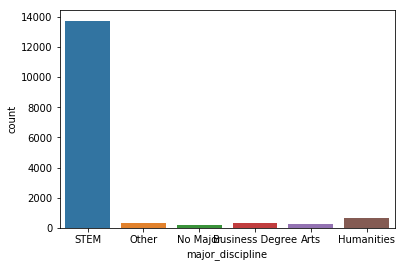

In [31]:
ax = sns.countplot(x="major_discipline", data=trainorig)

In [32]:
#Deduction :
#1. STEM (Science Technology, engineering, mathematics) comprise majority of the students.

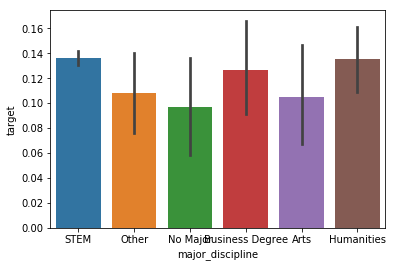

In [33]:
#plt.figure(figsize=(12,4))
sns.barplot(trainorig['major_discipline'], trainorig['target'])

In [34]:
#TODO : check which discipline performs best, and which worst

In [35]:
#TODO : divide into lesser buckets, 
#TODO : before that draw factorplot to find appropriate bucket range

In [36]:
#trainorig.city.unique
trainorig['experience'].unique()

array(['3', '14', '6', '8', '>20', '4', '9', '15', '10', '1', '5', '16',
       '11', '12', '7', '2', '13', '<1', '19', '18', '17', nan, '20'],
      dtype=object)

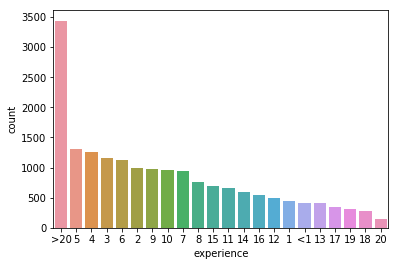

In [37]:
ax = sns.countplot(x="experience", data=trainorig,order = trainorig['experience'].value_counts().index)

In [38]:
#Deduction :
#1. Majority people have more than 20 years of experience
#2. There are a lot of people with upto 10 years of experience

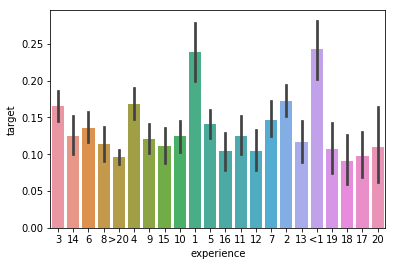

In [39]:
#plt.figure(figsize=(12,4))
sns.barplot(trainorig['experience'], trainorig['target'])

In [40]:
#find correlation bw training experience and target (active candidate)

In [41]:
#TODO : divide into lesser buckets, 
#TODO : before that draw factorplot to find appropriate bucket range

In [42]:
#trainorig.city.unique
trainorig['company_size'].unique()

array(['100-500', '<10', '50-99', nan, '5000-9999', '10000+', '1000-4999',
       '500-999', '10/49'], dtype=object)

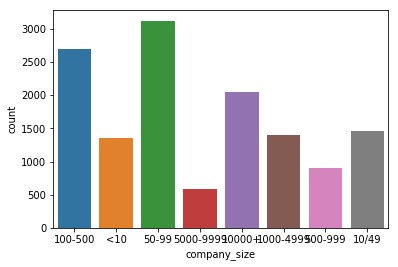

In [43]:
ax = sns.countplot(x="company_size", data=trainorig)

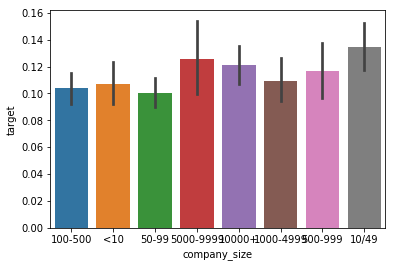

In [44]:
#plt.figure(figsize=(12,4))
sns.barplot(trainorig['company_size'], trainorig['target'])

In [45]:
#TODO : convert company_type names to numerical

In [46]:
#trainorig.city.unique
trainorig['company_type'].unique()

array(['Pvt Ltd', 'Funded Startup', 'Public Sector', nan,
       'Early Stage Startup', 'NGO', 'Other'], dtype=object)

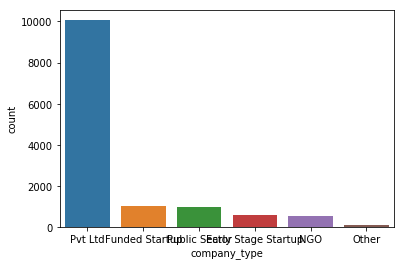

In [47]:
ax = sns.countplot(x="company_type", data=trainorig)

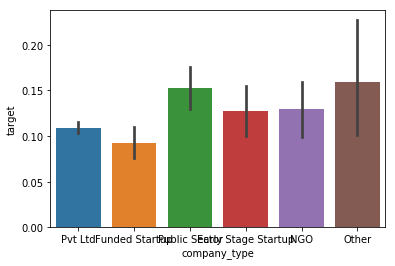

In [48]:
#plt.figure(figsize=(12,4))
sns.barplot(trainorig['company_type'], trainorig['target'])

In [49]:
#trainorig.city.unique
trainorig['last_new_job'].nunique()

6

In [50]:
#trainorig.city.unique
trainorig['last_new_job'].unique()

array(['1', '2', '3', '>4', 'never', '4', nan], dtype=object)

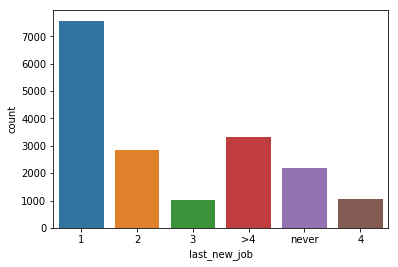

In [51]:
ax = sns.countplot(x="last_new_job", data=trainorig)

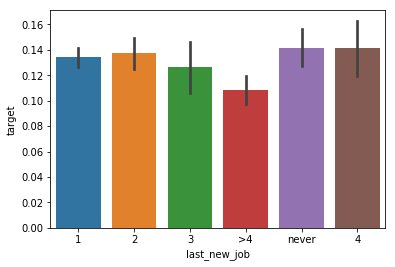

In [52]:
#plt.figure(figsize=(12,4))
sns.barplot(trainorig['last_new_job'], trainorig['target'])

In [53]:
#TODO : convert last new job names to numerical

In [54]:
#trainorig.city.unique
trainorig['training_hours'].nunique()

241

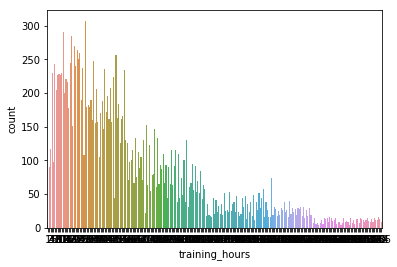

In [55]:
ax = sns.countplot(x="training_hours", data=trainorig)
#TODO - find a better method to plot this info

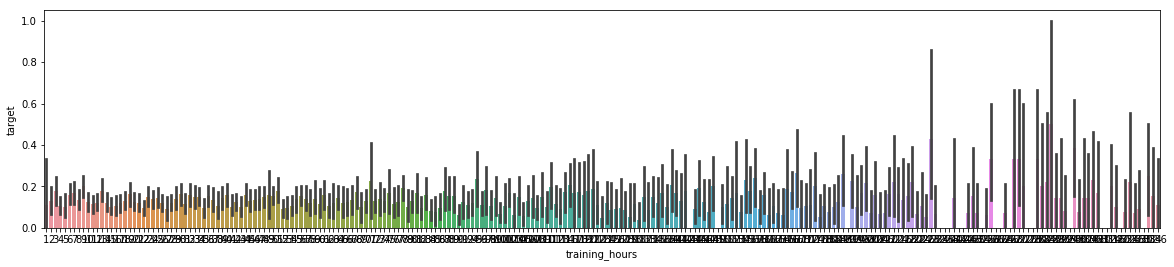

In [56]:
plt.figure(figsize=(20,4))
sns.barplot(trainorig['training_hours'], trainorig['target'])
#Find better method to plot this info

In [57]:
#TODO: draw factor plot to find buckets and then divide em into em

In [58]:
#trainorig.city.unique
trainorig['training_hours'].unique()

array([106,  69,   4,  26,  88,  34,  23,   8,  10,  85,  55,  13,  51,
        28,  35,  42,  45,  11,  12,  54,  89,  41, 298, 101, 114, 104,
        53,  39,  20, 109,   3,  68, 262,  16,  22,  67,  43,   7,  30,
         9, 112,  21, 166, 110,  18,  79,  98,  65,  61,  44, 170, 132,
       145,  48,  46,  37,  86,  96,  33, 152, 168, 128, 102,   6,  50,
        36,  90, 164,  56,  32,  17, 126,  72,  15,  80,  25,  31, 160,
        66,  24, 200,  47,  83,  58,  29, 206,  14, 105,  91, 218,  75,
        57,  19, 144,  92,  94, 184,  62, 140,  52, 258, 178, 270, 108,
       157, 156, 123,  59,  82,  60,   2, 196,  95,  84,   5, 146, 202,
       100, 111, 254,  27, 336,  64, 107,  76,  38, 134, 330, 204, 320,
        74,  73,  40,  87, 316, 118, 122, 282, 248, 153, 147,  70, 131,
       113, 216, 292,  81, 176,  78, 222, 163,  63, 280, 210, 294, 264,
       155,  77,  97, 224, 180, 236, 125, 162, 116, 158, 256,  49,  71,
       326,   1, 238, 124, 268, 214, 192, 232, 276, 165, 138, 31

In [59]:
trainorig['target'].unique()

array([0, 1])

In [60]:
#MIssing value treatement

In [61]:
trainorig.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [62]:
trainafternadrop = copy.deepcopy(trainorig)

In [63]:
testafternadrop = copy.deepcopy(testorig)

In [64]:
# Imputing missing value in age variable with median and in trainee_engagement_rating variable with mode of that variable.
trainafternadrop['gender'] = trainorig['gender'].fillna(trainorig['gender'].mode()[0])
trainafternadrop['enrolled_university'] = trainorig['enrolled_university'].fillna(trainorig['enrolled_university'].mode()[0])
trainafternadrop['education_level'] = trainorig['education_level'].fillna(trainorig['education_level'].mode()[0])
trainafternadrop['major_discipline'] = trainorig['major_discipline'].fillna(trainorig['major_discipline'].mode()[0])
trainafternadrop['experience'] = trainorig['experience'].fillna(trainorig['experience'].mode()[0])
trainafternadrop['company_size'] = trainorig['company_size'].fillna(trainorig['company_size'].mode()[0])
trainafternadrop['company_type'] = trainorig['company_type'].fillna(trainorig['company_type'].mode()[0])
trainafternadrop['last_new_job'] = trainorig['last_new_job'].fillna(trainorig['last_new_job'].mode()[0])

In [65]:
testorig.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3388
relevent_experience          0
enrolled_university        279
education_level            395
major_discipline          2393
experience                  44
company_size              4051
company_type              4330
last_new_job               304
training_hours               0
dtype: int64

In [66]:
#do same for test
testafternadrop['gender'] = testorig['gender'].fillna(trainorig['gender'].mode()[0])
testafternadrop['enrolled_university'] = testorig['enrolled_university'].fillna(trainorig['enrolled_university'].mode()[0])
testafternadrop['education_level'] = testorig['education_level'].fillna(trainorig['education_level'].mode()[0])
testafternadrop['major_discipline'] = testorig['major_discipline'].fillna(trainorig['major_discipline'].mode()[0])
testafternadrop['experience'] = testorig['experience'].fillna(trainorig['experience'].mode()[0])
testafternadrop['company_size'] = testorig['company_size'].fillna(trainorig['company_size'].mode()[0])
testafternadrop['company_type'] = testorig['company_type'].fillna(trainorig['company_type'].mode()[0])
testafternadrop['last_new_job'] = testorig['last_new_job'].fillna(trainorig['last_new_job'].mode()[0])

In [67]:
trainformodel=trainafternadrop.drop(['enrollee_id'], axis=1)
testformodel=testafternadrop.drop(['enrollee_id'], axis=1)

In [68]:
#using DownSampling

#1. separate based on target
train0 = trainformodel[trainformodel.target==0]
train1 = trainformodel[trainformodel.target==1]


In [69]:
train1['target'].value_counts()

1    2425
Name: target, dtype: int64

In [70]:
train0new = resample(train0, replace=False,n_samples=2425,random_state=123)

In [71]:
newtrain = pd.concat([train0new, train1])

In [72]:
newtrain.target.value_counts()

1    2425
0    2425
Name: target, dtype: int64

In [73]:
newtrain1 = newtrain.reset_index(drop=True)

In [74]:
newtrain1.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_21,0.624,Male,No relevent experience,no_enrollment,Graduate,STEM,1,<10,Pvt Ltd,1,29,0
1,city_73,0.754,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,13,0
2,city_75,0.939,Male,Has relevent experience,no_enrollment,Masters,STEM,10,1000-4999,Pvt Ltd,2,42,0
3,city_57,0.866,Male,Has relevent experience,Full time course,Graduate,STEM,7,50-99,Pvt Ltd,2,94,0
4,city_114,0.926,Male,No relevent experience,no_enrollment,High School,STEM,1,50-99,Pvt Ltd,1,59,0


In [75]:
X = newtrain1.drop('target',1)
y = newtrain1.target

In [76]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850 entries, 0 to 4849
Data columns (total 12 columns):
city                      4850 non-null object
city_development_index    4850 non-null float64
gender                    4850 non-null object
relevent_experience       4850 non-null object
enrolled_university       4850 non-null object
education_level           4850 non-null object
major_discipline          4850 non-null object
experience                4850 non-null object
company_size              4850 non-null object
company_type              4850 non-null object
last_new_job              4850 non-null object
training_hours            4850 non-null int64
dtypes: float64(1), int64(1), object(10)
memory usage: 454.8+ KB


In [77]:
y.value_counts()

1    2425
0    2425
Name: target, dtype: int64

In [78]:
X=pd.get_dummies(X)
traindummies=pd.get_dummies(newtrain1)
testdummies=pd.get_dummies(testformodel)

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850 entries, 0 to 4849
Columns: 183 entries, city_development_index to last_new_job_never
dtypes: float64(1), int64(1), uint8(181)
memory usage: 933.1 KB


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [81]:
set(testdummies.columns) - set(traindummies.columns)

{'city_city_140', 'city_city_8', 'city_city_82'}

In [82]:
traindummies.head()

,city_development_index,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.624,29,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0.754,13,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.939,42,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0.866,94,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0.926,59,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [83]:
#adding missing dummies of train to test
missing_cols = set( testdummies.columns ) - set( traindummies.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    traindummies[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X = traindummies[testdummies.columns]

In [84]:
#one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)
#one_hot_encoded_test_predictors = pd.get_dummies(test_predictors)
#final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
#                                                                    join='left', 
#                                                                    axis=1)


In [85]:
testdummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15021 entries, 0 to 15020
Columns: 186 entries, city_development_index to last_new_job_never
dtypes: float64(1), int64(1), uint8(184)
memory usage: 2.9 MB


In [86]:
traindummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850 entries, 0 to 4849
Columns: 187 entries, city_development_index to city_city_8
dtypes: float64(1), int64(5), uint8(181)
memory usage: 1.1 MB


In [101]:
# Logistic regression using 5 fold stratified cross validation
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred=model.predict_proba(xvl)[:,1]
     score = roc_auc_score(yvl,pred)
     print('roc_auc_score',score)
     i+=1
# Making predictions for the test data
pred=model.predict_proba(testdummies)[:,1]


1 of kfold 5
roc_auc_score 0.6181698373897332

2 of kfold 5
roc_auc_score 0.6531661175470295

3 of kfold 5
roc_auc_score 0.6130513338293124

4 of kfold 5
roc_auc_score 0.6565033478584335

5 of kfold 5
roc_auc_score 0.6027781910936338


In [88]:
submission = pd.read_csv('sample_submission_sxfcbdx.csv')

In [89]:
submission.head()

,enrollee_id,target
0,16548,0
1,12036,0
2,11061,0
3,5032,0
4,17599,0


In [99]:
submission['target']=pred

TypeError: type numpy.ndarray doesn't define __round__ method

In [91]:
submission.to_csv('logisticreg2.csv',index = False)

In [95]:
sub = pd.read_csv('logisticreg1.csv')

In [96]:
sub

,enrollee_id,target
0,16548,0.626373
1,12036,0.094061
2,11061,0.240410
3,5032,0.100140
4,17599,0.036372
5,19314,0.118326
6,12365,0.229731
7,22696,0.098357
8,16083,0.081205
9,33240,0.115762


array([0.75528586, 0.44456168, 0.67529602, ..., 0.30319252, 0.508844  ,
       0.80676364])